In [1]:
import sys
sys.path.append('..')

import os
from os.path import join, splitext

from config import *
from sim.db.tools import *

import pandas as pd
import numpy as np

%matplotlib inline

2017-09-08 00:00:26,614 - sim - INFO - Reading mysql table i_reload_setting


In [2]:
machine_table = load_last_result_table(table_name="o_machine_table")
# machine_table = table_dict.get("machine_table")

2017-09-08 00:00:53,347 - sim - INFO - Reading mysql table o_machine_table


In [3]:
machine_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3227635 entries, 0 to 3227634
Data columns (total 8 columns):
equipment_id       object
parcel_id          object
small_id           object
parcel_type        object
time_stamp         float64
action             object
real_time_stamp    datetime64[ns]
run_time           datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 197.0+ MB


In [4]:
machine_table.sort_values(['small_id', 'time_stamp'], inplace=True)

In [5]:
machine_table.head(10)

,equipment_id,parcel_id,small_id,parcel_type,time_stamp,action,real_time_stamp,run_time
2975016,a1_4,795320,1006939,small,17605.0,wait,2017-08-16 01:53:25,2017-09-07 23:47:40
2975034,a1_4,795320,1006939,small,17605.0,start,2017-08-16 01:53:25,2017-09-07 23:47:40
2975053,a1_4,795320,1006939,small,17605.0,end,2017-08-16 01:53:25,2017-09-07 23:47:40
2916934,m4_4,795320,1006939,small,17618.0,wait,2017-08-16 01:53:38,2017-09-07 23:47:40
2916950,m4_4,795320,1006939,small,17618.0,start,2017-08-16 01:53:38,2017-09-07 23:47:40
2937315,m4_4,795320,1006939,small,17621.0,end,2017-08-16 01:53:41,2017-09-07 23:47:40
2947086,x6_1,795320,1006939,small,17738.9,wait,2017-08-16 01:55:39,2017-09-07 23:47:40
2947100,x6_1,795320,1006939,small,17738.9,start,2017-08-16 01:55:39,2017-09-07 23:47:40
2947114,x6_1,795320,1006939,small,17738.9,end,2017-08-16 01:55:39,2017-09-07 23:47:40
2985255,u2_2,795320,1006939,small,17770.5,wait,2017-08-16 01:56:11,2017-09-07 23:47:40


In [6]:
unique_parcel_id = len(machine_table.parcel_id.unique())
unique_small_id = len(machine_table.small_id.unique())
# unique_truck_id = len(truck_table.truck_id.unique())

print(unique_parcel_id, unique_small_id,)

105019 151107


In [7]:
# checking j balance~~~~~~

ind_j = machine_table.equipment_id.str.startswith('j')
ind_start = machine_table.action == 'start'

j_table = machine_table[ind_j & ind_start]

In [ ]:
table_j38 = machine_table[machine_table.small_id.isin(j_table[j_table.equipment_id == 'j38_1']['small_id'])]

In [ ]:
table_j38_m = table_j38[table_j38.equipment_id.str.startswith('m')]

In [ ]:
table_j38_m.equipment_id.unique()

In [8]:
temp_j = j_table.groupby(['equipment_id'])['parcel_id'].unique().apply(len)

In [9]:
temp_j

equipment_id
j10_1    3102
j15_1    3102
j16_1    3101
j1_1     1988
j21_1    2660
j22_1    2660
j23_1    1657
j24_1    1657
j27_1    1987
j28_1    1987
j2_1     1987
j33_1    3192
j34_1    3192
j37_1    1987
j38_1    3721
j41_1    2578
j5_1     1987
j6_1     1987
j7_1     1440
j8_1     1440
j9_1     3101
Name: parcel_id, dtype: int64

In [21]:
time_table, _ = get_equipment_timetable()

2017-09-08 00:25:26,369 - sim - INFO - Reading mysql table i_equipment_io


In [20]:
time_table_j = {k: v for k, v in time_table.items() if k in temp_j.index}

In [22]:
from IPython.display import display

In [26]:
temp_j = temp_j.to_frame()

In [28]:
temp_j = temp_j.reset_index()

In [29]:
temp_j['time_table'] = temp_j['equipment_id'].apply(lambda x: time_table_j[x])

In [33]:
queue_io = load_from_mysql('i_queue_io')

j_last_port_counts = queue_io[queue_io.equipment_port_next.str.contains('j')]\
                        .groupby('equipment_port_next')['equipment_port_last'].apply(set).apply(len)

2017-09-08 08:51:27,464 - sim - INFO - Reading mysql table i_queue_io


In [44]:
j_last_port = queue_io[queue_io.equipment_port_next.str.contains('j')]\
                        .groupby('equipment_port_next')['equipment_port_last'].apply(set)

In [47]:
j_last_port['j38_1'] - j_last_port['j10_1']

{'m3_1', 'm3_2'}

In [39]:
temp_j = temp_j.set_index('equipment_id')

In [41]:
temp_j['last_port_num'] = j_last_port_counts

In [43]:
temp_j.sort_values('parcel_id', ascending=False)

,parcel_id,time_table,last_port_num
equipment_id,,,
j38_1,3721,"[(0.0, inf)]",12
j34_1,3192,"[(3600.0, inf)]",12
j33_1,3192,"[(3600.0, inf)]",12
j10_1,3102,"[(0.0, inf)]",10
j15_1,3102,"[(0.0, inf)]",10
j9_1,3101,"[(0.0, inf)]",10
j16_1,3101,"[(0.0, inf)]",10
j22_1,2660,"[(3600.0, inf)]",10
j21_1,2660,"[(3600.0, inf)]",10


In [12]:
# checking c wait counts

ind_c = machine_table.equipment_id.str.startswith('c')
ind_wait = machine_table.action == 'wait'
ind_small = machine_table.parcel_type == 'small'

In [ ]:
temp_t = machine_table[ind_c & ind_wait & ind_small]

In [ ]:
res = temp_t.groupby('small_id').size()

In [ ]:
res.unique()

In [ ]:
# checking equal
machine_table[(machine_table.action == 'start') & (machine_table.equipment_id.str.startswith('u'))]\
    .groupby(['equipment_id'])['parcel_id'].apply(lambda x: len(x.unique()))

In [ ]:
# checking 
machine_table[machine_table.small_id == '1142056'].sort_values('time_stamp')

## checking machine process two items

In [ ]:
machine_table[(machine_table.action == 'start') & (machine_table.equipment_id.str.startswith('u'))].groupby(['equipment_id', 'time_stamp'])\
    ['parcel_id'].value_counts().groupby(level=[0, 1,]).count()

## checking machine open time

In [ ]:
%matplotlib inline

In [ ]:
g = machine_table[(machine_table.action == 'start') & (machine_table.equipment_id.str.startswith('u'))]\
    .groupby('equipment_id')['time_stamp']

In [ ]:
g.groups.keys()

In [ ]:
g.get_group('u6_1').plot('hist')

## checking path

In [ ]:
temp = machine_table.groupby('small_id')['equipment_id'].apply(lambda x: len(x.unique()))

In [ ]:
temp.value_counts()

In [ ]:
ind_2 = temp[temp == 16].index

In [ ]:
ind_2

In [ ]:
list_of_equipments = machine_table[machine_table.small_id.isin(ind_2)].equipment_id.unique()

In [ ]:
[x for x in list_of_equipments if x[0] == 'm']

In [ ]:
machine_table[machine_table.small_id == 676644]

In [ ]:
machine_table[machine_table.small_id.isin(ind_2)]

In [ ]:
machine_table[machine_table.small_id == '1072470']

## checking m j wait time

In [ ]:
targe_small = machine_table[machine_table.equipment_id.str.contains('j')].small_id.unique()

target_table = machine_table[machine_table.small_id.isin(targe_small)]

ind_m = target_table.equipment_id.str.startswith('m')
ind_j = target_table.equipment_id.str.startswith('j')

ind_wait = target_table.action == 'wait'
ind_end = target_table.action == 'end'
ind_start = target_table.action == 'start'

mj_table = target_table[(ind_m & ind_end) | (ind_j & ind_start)]

result_diff = \
    mj_table.set_index(['equipment_id', 'small_id', 'action'])['time_stamp'].diff().reset_index()

mj_table.set_index(['equipment_id', 'small_id', 'action'])\
    .groupby(level=1)['time_stamp'].apply(lambda x: x.diff()).reset_index()

result = result_diff[result_diff.action == 'start']

In [ ]:
result.min()

In [ ]:
result.time_stamp.replace(0, np.nan).describe()

In [ ]:
%matplotlib inline
result.time_stamp.plot(kind='hist')

## checking r/a last work time

In [ ]:
r_a_table = machine_table[machine_table.equipment_id.str.get(0).isin(['r', 'a'])]

r_a_table_last = r_a_table.groupby('equipment_id')['real_time_stamp'].max().reset_index()

unload_setting = get_unload_setting()

r_a_table_last['real_time_stamp'] = pd.to_datetime(r_a_table_last['real_time_stamp'])

r_a_table_last_res = \
    r_a_table_last\
        .groupby([r_a_table_last['equipment_id']\
                  .apply(lambda x: tuple(unload_setting[x])), 'equipment_id'])\
            ['real_time_stamp'].apply(lambda x: list(x)[0])

r_a_table_last_res = r_a_table_last_res.rename_axis(['unload_type', 'equipment_id']).reset_index()

cols = ['unload_type', 'real_time_stamp']

r_a_table_last_res_sort = \
    r_a_table_last_res.sort_values(cols).set_index(['unload_type', 'equipment_id'])

In [ ]:
r_a_table_last_res_sort

## analysis truck

In [ ]:
truck_table_end = truck_table[truck_table.action == 'end']

truck_table_end_store_count = \
    truck_table_end.groupby(
        [truck_table_end['equipment_id'].apply(lambda x: tuple(unload_setting[x])), 'equipment_id'])\
            ['store_size'].sum()

truck_table_end_store_count = \
    truck_table_end_store_count.rename_axis(['unload_type', 'equipment_id']).reset_index()

cols = ['unload_type', 'store_size']
truck_table_end_store_count_sort = \
    truck_table_end_store_count.sort_values(cols).set_index(['unload_type', 'equipment_id'])

truck_unload_table = \
    pd.concat([truck_table_end_store_count_sort, r_a_table_last_res_sort], axis=1)

truck_unload_table.reset_index(inplace=True)

In [ ]:
truck_unload_table.sort_values(['unload_type', 'store_size']).set_index(['unload_type', 'equipment_id'])

## j table

需要过安检的量

In [ ]:
truck_table_end[truck_table_end.truck_type == 'LA'].store_size.sum()

In [ ]:
j_table = machine_table[machine_table.equipment_id.str.contains('j')]

In [ ]:
j41_table = machine_table[machine_table.equipment_id.str.contains('j41')]

实际过安检的量

In [ ]:
len(j_table.parcel_id.unique())

过 j41 安检的量

In [ ]:
len(j41_table.parcel_id.unique())

每个安检机处理的量

In [ ]:
j_process_count = j_table.groupby('equipment_id')['parcel_id'].apply(lambda x: len(set(x)))

In [ ]:
j_process_count

# random

In [ ]:
import random

small_id_store = machine_table.small_id.unique()

In [ ]:
g = machine_table.groupby('small_id')

In [ ]:
small_id = random.choice(small_id_store)
g.get_group(small_id)

In [ ]:
one_package = g.get_group(small_id)

In [ ]:
one_package.set_index(['equipment_id', 'action',])['time_stamp'].diff()

## 小件分拣机等待时间

In [ ]:
ind_j = machine_table.equipment_id.str.startswith('j')
ind_c = machine_table.equipment_id.str.startswith('c')

ind_u = machine_table.equipment_id.str.startswith('u')
ind_x = machine_table.equipment_id.str.startswith('x6') | machine_table.equipment_id.str.startswith('x7')

ind_r_a = machine_table.equipment_id.str.startswith('r') | machine_table.equipment_id.str.startswith('a')
ind_m = machine_table.equipment_id.str.startswith('m')

ind_end = machine_table.action == 'end'
ind_wait = machine_table.action == 'wait'

In [ ]:
c_j_table = machine_table[ind_c & ind_end].append(machine_table[ind_j & ind_wait])
u_x_table = machine_table[ind_x & ind_end].append(machine_table[ind_u & ind_wait])
r_a_m_table = machine_table[ind_r_a & ind_end].append(machine_table[ind_m & ind_wait])

In [ ]:
u_x_table.sort_values(['small_id', 'action'], inplace=True)

In [ ]:
u_x_table.groupby('small_id').apply(lambda x: x['time_stamp'].diff()).apply(lambda x: round(x, 2)).unique()

In [ ]:
c_j_table.groupby('small_id').apply(lambda x: x['time_stamp'].diff()).apply(lambda x: round(x, 2)).unique()

In [ ]:
r_a_m_table.groupby('small_id').apply(lambda x: x['time_stamp'].diff()).apply(lambda x: round(x, 2)).unique()

## 处理时间分布

In [13]:
g = machine_table.groupby('small_id')
table_diff = g['time_stamp'].apply(lambda x: x.max() - x.min())

In [14]:
table_diff.describe()

count    151107.000000
mean       3541.187989
std        2507.104095
min           0.000000
25%        1661.020000
50%        3111.700000
75%        4986.600000
max       20185.300000
Name: time_stamp, dtype: float64

In [15]:
table_diff[table_diff > 30000].count()

0

In [16]:
bins = list(range(int(table_diff.min()), int(table_diff.max()), 1800))

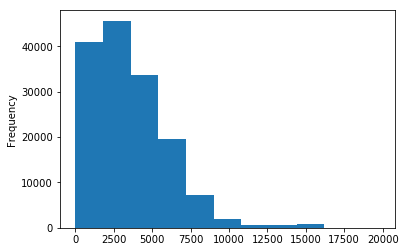

In [17]:
table_diff.plot(kind='hist', bins=bins)

In [18]:
table_diff[table_diff <= 3600 * 3.5].sum() / table_diff.sum()

0.9582301710307062